# **Topic: 台積電股價預測 Linear Regression**
### Method Follow CRISP-DM
<!-- ![CRISP](https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png) -->

<img src="https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png" width=500>

## Step 1: Get Data 
* collect from sensors 
* read csv, xml
* Database
* web crawler (web, opendata)
* API (群益API) = Restful API (HTTP GET)
 
  Python 後端程式框架
  ==> flask, Django, fastapi, ASYN, swagger 文件






Index(['Date', 'y', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')
        Date    y     x1     x2     x3     x4     x5
0  2021/9/22  586  600.0  600.0  607.0  613.0  615.0
1  2021/9/23  588  586.0  600.0  600.0  607.0  613.0
2  2021/9/24  598  588.0  586.0  600.0  600.0  607.0
3  2021/9/27  602  598.0  588.0  586.0  600.0  600.0
4  2021/9/28  594  602.0  598.0  588.0  586.0  600.0
5  2021/9/29  580  594.0  602.0  598.0  588.0  586.0
6  2021/9/30  580  580.0  594.0  602.0  598.0  588.0
7  2021/10/1  574  580.0  580.0  594.0  602.0  598.0
8  2021/10/4  572  574.0  580.0  580.0  594.0  602.0
9  2021/10/5  572  572.0  574.0  580.0  580.0  594.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    240 non-null    object 
 1   y       240 non-null    object 
 2   x1      240 non-null    float64
 3   x2      240 non-null    float64
 4   x3      240 non-nul

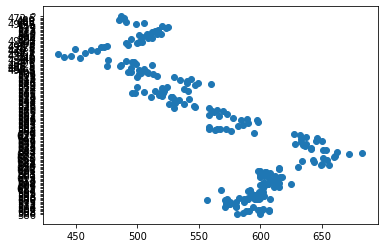

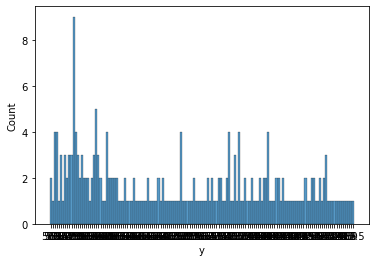

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# Data Viz tool (visualization)
# python matplotlib, seaborn, D3.js, plotly
# Google Data Studio, Tableau, Power BI 

data=pd.read_csv("2330.TW.csv")
print(data.columns)
print(data.head(10))
print(data.info())
print(data.describe())
plt.scatter(data.x1,data.y)
plt.show()

sns.histplot(data.y)

#--------------practice----------
# data=pd.read_csv("data.csv")
# print(type(data))

# print(data.head())
# data.head(10)
# data.info()
# data.describe()
#-------------------------------



## Step 2: Prepoare X, Y
* data missing ==> imputation (插補)
* data normalization
* categorical data ==> onehot encoding
* data format for different package
 example (python <-> numpy <-> sklearn)
* data augmentation 

In [29]:
print(data.columns)
print(data.index)

# X=data.x.values.reshape(-1,1)
# Y=data['y'].values.reshape(-1,1)

X=data.iloc[:-1,2:].values.reshape(-1,5)
Y=data.iloc[:-1,1].values.reshape(-1,1)



print(type(X),X.shape)
print(type(Y),Y.shape)
X

Index(['Date', 'y', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')
RangeIndex(start=0, stop=240, step=1)
<class 'numpy.ndarray'> (239, 5)
<class 'numpy.ndarray'> (239, 1)


array([[600. , 600. , 607. , 613. , 615. ],
       [586. , 600. , 600. , 607. , 613. ],
       [588. , 586. , 600. , 600. , 607. ],
       ...,
       [489. , 486. , 485. , 490.5, 505. ],
       [472.5, 489. , 486. , 485. , 490.5],
       [475. , 472.5, 489. , 486. , 485. ]])

## Step 3: Select Model
<img src="https://miro.medium.com/max/720/1*q0COC8-Q0vOnuKSaENwivg.png" width=500>


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn import linear_model

# model selection
# using Lasso model
# model = linear_model.Lasso(alpha=0.1)

# using Linear Regression
model =LR()
print(model)
model.fit(X,Y)

# y=ax+b
a= model.coef_
b=float(model.intercept_)




def plotmodel(a=5,b=5):
  print("a=",a,"b=",b)
  xm=np.array([0,1000])
  ym=a*xm+b
  plt.scatter(X,Y)
  plt.plot(xm,ym,'r')
  plt.show()

# plotmodel()
# plotmodel(a,b)

LinearRegression()


## Step 4: Evaluate Model Performance

* Mean Square Error
* Mean Absolute Error
* R-square

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_true =Y
y_pred = model.predict(X)
r2=r2_score(y_true, y_pred)
mse=mean_squared_error(y_true, y_pred)
mae=mean_absolute_error(y_true, y_pred)

print("r2=",r2)
print("mse=",mse)
print("mae=",mae)



r2= 0.9739078063180303
mse= 76.71405805988333
mae= 6.7689225260116554


## Step 5: Deploy Prediction

* purpose => 將 AI model push to deployment 


In [33]:
data=data[:-1]
data['preY']=y_pred

print(data.tail())

          Date      y     x1     x2     x3     x4     x5        preY
234   2022/9/5    486  485.0  490.5  505.0  496.0  498.5  485.651710
235   2022/9/6    489  486.0  485.0  490.5  505.0  496.0  487.583711
236   2022/9/7  472.5  489.0  486.0  485.0  490.5  505.0  489.689950
237   2022/9/8    475  472.5  489.0  486.0  485.0  490.5  471.585457
238  2022/9/12  486.5  475.0  472.5  489.0  486.0  485.0  476.694645


In [ ]:
# DataFrame write to csv 
data.to_csv("result.csv",index=False, mode='w')
